# Import

In [1]:
import numpy as np
import time
from collections import OrderedDict
from PIL import Image
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import models, transforms
from dataloader import Lung_Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pickle
import os
from utils import validation, confusionMatrix, saveHistorical, save, load, plot_loss, train, evaluation

# Data preprocessing

In [2]:
# # Define your transforms for the training, validation, and testing sets
# transforms = transforms.Compose([transforms.Resize(150),
#                                transforms.ToTensor(),
#                                transforms.Normalize([0.485],
#                                                    [0.229])])

# Define model

## AlexNet

In [8]:
from models import AlexNet

model_name="alexNet"
lr=0.001
epochs=20
bs = 16
gpu="cuda"
save_dir="model/alexNet"

ld_train = Lung_Dataset(groups="train")
ld_val = Lung_Dataset(groups="val")
ld_test = Lung_Dataset(groups="test")

trainloader = DataLoader(ld_train, batch_size = bs, shuffle = True)
testloader = DataLoader(ld_test, batch_size = bs, shuffle = True)
validloader = DataLoader(ld_val, batch_size = bs, shuffle = True)

model = AlexNet(3)
# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr)

In [10]:
model_dict = train(model=model,
        n_epoch=epochs,
        device=gpu,
        criterion=criterion,
        optimizer=optimizer,
        trainloader=trainloader,
        validloader=testloader,
        model_name=model_name,
        save_dir=save_dir,
        save_model=True)

Epoch: 1/20 -  Training Loss: 1.066 -  Training Accuracy: 0.475 -  Validation Loss: 1.120 -  Validation Accuracy: 0.396
Epoch: 1/20 -  Training Loss: 1.063 -  Training Accuracy: 0.485 -  Validation Loss: 1.103 -  Validation Accuracy: 0.392
Epoch: 1/20 -  Training Loss: 0.999 -  Training Accuracy: 0.507 -  Validation Loss: 1.069 -  Validation Accuracy: 0.580
Epoch: 2/20 -  Training Loss: 0.940 -  Training Accuracy: 0.565 -  Validation Loss: 0.996 -  Validation Accuracy: 0.512
Epoch: 2/20 -  Training Loss: 0.918 -  Training Accuracy: 0.570 -  Validation Loss: 1.035 -  Validation Accuracy: 0.546
Epoch: 2/20 -  Training Loss: 0.871 -  Training Accuracy: 0.589 -  Validation Loss: 1.105 -  Validation Accuracy: 0.428
Epoch: 3/20 -  Training Loss: 0.813 -  Training Accuracy: 0.627 -  Validation Loss: 1.177 -  Validation Accuracy: 0.535
Epoch: 3/20 -  Training Loss: 0.806 -  Training Accuracy: 0.638 -  Validation Loss: 1.065 -  Validation Accuracy: 0.574
Epoch: 3/20 -  Training Loss: 0.786 -  T

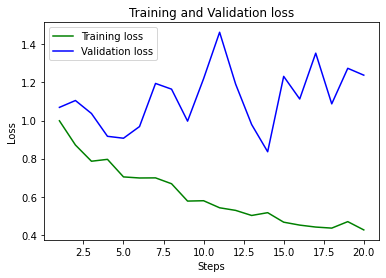

In [11]:
# plot and save
h = model_dict['history']
plot_loss(h['training_loss'], h['validation_loss'], save_dir)

## Simple convolutional

In [12]:
from models import Convolutional

model_name="lungConv"
lr=0.001
epochs=20
bs = 16
gpu="cuda"
save_dir="model/lungConv"

ld_train = Lung_Dataset(groups="train")
ld_val = Lung_Dataset(groups="val")
ld_test = Lung_Dataset(groups="test")

trainloader = DataLoader(ld_train, batch_size = bs, shuffle = True)
testloader = DataLoader(ld_test, batch_size = bs, shuffle = True)
validloader = DataLoader(ld_val, batch_size = bs, shuffle = True)

model = Convolutional(3)
# Define criterion and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = lr)

In [13]:
model_dict = train(model=model,
        n_epoch=epochs,
        device=gpu,
        criterion=criterion,
        optimizer=optimizer,
        trainloader=trainloader,
        validloader=testloader,
        model_name=model_name,
        save_dir=save_dir,
        save_model=True)

Epoch: 1/20 -  Training Loss: 0.783 -  Training Accuracy: 0.654 -  Validation Loss: 0.935 -  Validation Accuracy: 0.620
Epoch: 1/20 -  Training Loss: 0.589 -  Training Accuracy: 0.743 -  Validation Loss: 1.109 -  Validation Accuracy: 0.600
Epoch: 1/20 -  Training Loss: 0.530 -  Training Accuracy: 0.784 -  Validation Loss: 0.760 -  Validation Accuracy: 0.766
Epoch: 2/20 -  Training Loss: 0.518 -  Training Accuracy: 0.772 -  Validation Loss: 0.839 -  Validation Accuracy: 0.746
Epoch: 2/20 -  Training Loss: 0.477 -  Training Accuracy: 0.794 -  Validation Loss: 0.893 -  Validation Accuracy: 0.760
Epoch: 2/20 -  Training Loss: 0.506 -  Training Accuracy: 0.778 -  Validation Loss: 1.528 -  Validation Accuracy: 0.644
Epoch: 3/20 -  Training Loss: 0.481 -  Training Accuracy: 0.779 -  Validation Loss: 1.336 -  Validation Accuracy: 0.650
Epoch: 3/20 -  Training Loss: 0.431 -  Training Accuracy: 0.808 -  Validation Loss: 1.233 -  Validation Accuracy: 0.729
Epoch: 3/20 -  Training Loss: 0.459 -  T

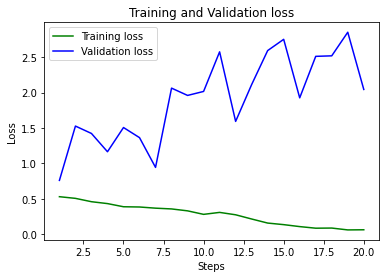

In [14]:
# plot and save
h = model_dict['history']
plot_loss(h['training_loss'], h['validation_loss'], save_dir)

## ResNet

In [16]:
from models import LungResNetModel
model_name="lungResNet"
lr=0.001
epochs=20
bs = 16
gpu="cuda"
save_dir="model/lungResNet"

ld_train = Lung_Dataset(groups="train")
ld_val = Lung_Dataset(groups="val")
ld_test = Lung_Dataset(groups="test")

trainloader = DataLoader(ld_train, batch_size = bs, shuffle = True)
testloader = DataLoader(ld_test, batch_size = bs, shuffle = True)
validloader = DataLoader(ld_val, batch_size = bs, shuffle = True)

model = LungResNetModel()
# Define criterion and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = lr)



In [17]:
model_dict = train(model=model,
        n_epoch=epochs,
        device=gpu,
        criterion=criterion,
        optimizer=optimizer,
        trainloader=trainloader,
        validloader=testloader,
        model_name=model_name,
        save_dir=save_dir,
        save_model=True)

Epoch: 1/20 -  Training Loss: 0.809 -  Training Accuracy: 0.637 -  Validation Loss: 21.369 -  Validation Accuracy: 0.381
Epoch: 1/20 -  Training Loss: 0.729 -  Training Accuracy: 0.673 -  Validation Loss: 0.871 -  Validation Accuracy: 0.655
Epoch: 1/20 -  Training Loss: 0.715 -  Training Accuracy: 0.684 -  Validation Loss: 6.458 -  Validation Accuracy: 0.391
Epoch: 2/20 -  Training Loss: 0.695 -  Training Accuracy: 0.684 -  Validation Loss: 1.532 -  Validation Accuracy: 0.410
Epoch: 2/20 -  Training Loss: 0.627 -  Training Accuracy: 0.721 -  Validation Loss: 0.825 -  Validation Accuracy: 0.624
Epoch: 2/20 -  Training Loss: 0.631 -  Training Accuracy: 0.719 -  Validation Loss: 1.566 -  Validation Accuracy: 0.496
Epoch: 3/20 -  Training Loss: 0.630 -  Training Accuracy: 0.735 -  Validation Loss: 2.659 -  Validation Accuracy: 0.412
Epoch: 3/20 -  Training Loss: 0.589 -  Training Accuracy: 0.741 -  Validation Loss: 1.055 -  Validation Accuracy: 0.588
Epoch: 3/20 -  Training Loss: 0.590 -  

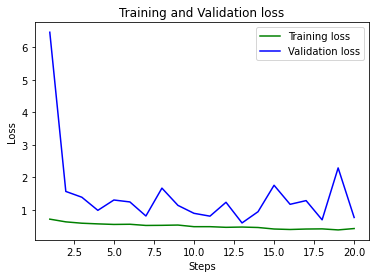

In [18]:
# plot and save
h = model_dict['history']
plot_loss(h['training_loss'], h['validation_loss'], save_dir)

# Evaluation

In [14]:
from models import Convolutional, LungResNetModel, AlexNet

lungResNet = load(LungResNetModel(), "model/lungResNet/lungResNet")
lungConv = load(Convolutional(3), "model/lungConv/lungConv")
alexNet = load(AlexNet(3), "model/alexNet/alexNet")

In [15]:
ld_val = Lung_Dataset(groups="val")
validloader = DataLoader(ld_val, batch_size = 1, shuffle = True)

acc_resnet = evaluation(lungResNet, validloader)
acc_conv = evaluation(lungConv, validloader)
acc_alexNet = evaluation(alexNet, validloader)

print("Resnet accuracy: ", acc_resnet)
print("Convolutional accuracy: ", acc_conv)
print("AlexNet accuracy: ", acc_alexNet)

Resnet accuracy:  tensor(0.6400)
Convolutional accuracy:  tensor(0.7200)
AlexNet accuracy:  tensor(0.6800)


=============Resnet================


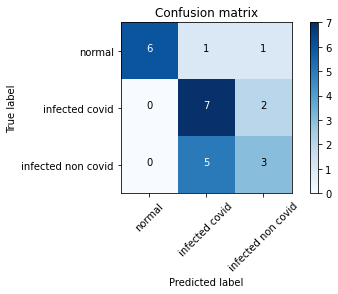

==============Conv================


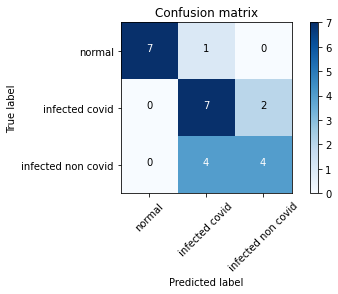

=============alexNet================


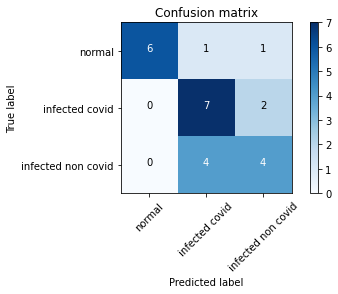

In [16]:
from utils import plot_confusion_matrix

cm_resnet = np.array(confusionMatrix(lungResNet, validloader))
cm_conv = np.array(confusionMatrix(lungConv, validloader))
cm_alexNet = np.array(confusionMatrix(alexNet, validloader))

print("=============Resnet================")
plot_confusion_matrix(cm_resnet, ["normal", "infected covid", "infected non covid"])
print("==============Conv================")
plot_confusion_matrix(cm_conv, ["normal", "infected covid", "infected non covid"])
print("=============alexNet================")
plot_confusion_matrix(cm_alexNet, ["normal", "infected covid", "infected non covid"])

In [17]:
def calFNR(cm):
    TP = cm[1][1]
    FN = cm[1][0] + cm[1][2]
    return FN/(FN+TP)
print("False Negative Rate for infected covid")
print("=============Resnet================")
print("False negative rate: ", calFNR(cm_resnet))
print("==============Conv================")
print("False negative rate: ", calFNR(cm_conv))
print("=============alexNet================")
print("False negative rate: ", calFNR(cm_alexNet))

False Negative Rate for infected covid
=============Resnet================
False negative rate:  0.22222222
==============Conv================
False negative rate:  0.22222222
=============alexNet================
False negative rate:  0.22222222


In [18]:
def calFPR(cm):
    TN = cm[1][1] + cm[2][2]
    FP = cm[0][1] + cm[0][2]
    return FP/(FP+TN)
print("False Positive Rate for normal")
print("=============Resnet================")
print("False Positive rate: ", calFPR(cm_resnet))
print("==============Conv================")
print("False Positive rate: ", calFPR(cm_conv))
print("=============alexNet================")
print("False Positive rate: ", calFPR(cm_alexNet))


False Positive Rate for normal
=============Resnet================
False Positive rate:  0.16666667
==============Conv================
False Positive rate:  0.083333336
=============alexNet================
False Positive rate:  0.15384616


In [19]:
for image, label in validloader:
    print(label)

tensor([[0., 1., 0.]])
tensor([[0., 0., 1.]])
tensor([[1., 0., 0.]])
tensor([[0., 0., 1.]])
tensor([[1., 0., 0.]])
tensor([[0., 1., 0.]])
tensor([[0., 0., 1.]])
tensor([[0., 1., 0.]])
tensor([[0., 1., 0.]])
tensor([[0., 1., 0.]])
tensor([[1., 0., 0.]])
tensor([[1., 0., 0.]])
tensor([[1., 0., 0.]])
tensor([[0., 0., 1.]])
tensor([[1., 0., 0.]])
tensor([[0., 1., 0.]])
tensor([[0., 0., 1.]])
tensor([[0., 1., 0.]])
tensor([[0., 0., 1.]])
tensor([[1., 0., 0.]])
tensor([[0., 0., 1.]])
tensor([[1., 0., 0.]])
tensor([[0., 0., 1.]])
tensor([[0., 1., 0.]])
tensor([[0., 1., 0.]])


In [67]:
def plot_all(model, validloader, class_names=['normal', 'infected covid', 'infected non covid'], device='cuda'):
    model.eval()
    model.to(device)
    
    preds = []
    actuals = []
    imgs = []
    for images, labels in validloader:
        imgs.append(images.numpy())
        images, labels = images.to(device), labels.to(device)
        
        # revert one hot encoding
        labels = torch.argmax(labels, dim=1)
        output = model.forward(images)
        
        ps = torch.exp(output)
        act = ps.max(dim=1)[1][0]
        
        label = labels.cpu().detach().numpy()
        act = ps.max(dim=1)[1].cpu().detach().numpy()
        
        actuals.append(label[0])
        preds.append(act[0])

    plt.figure(figsize=(15,15))
    for i in range(24):
        plt.subplot(4,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imgs[i].reshape(150,150), cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(f"Truth: {class_names[actuals[i]]}\nPred: {class_names[preds[i]]}")
    plt.show()

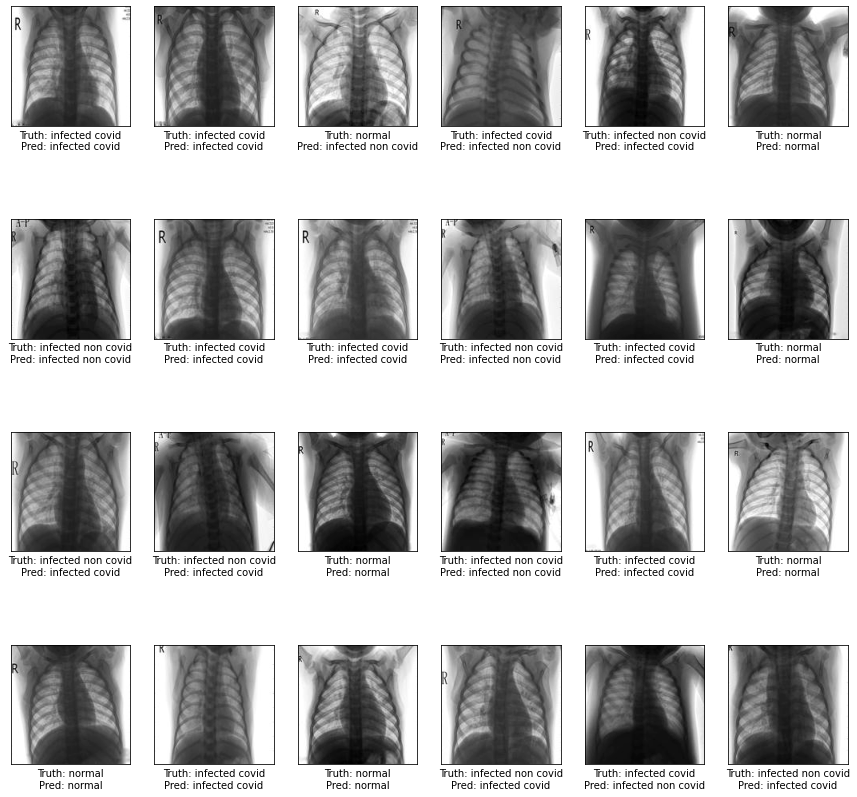

In [68]:
print("ResNet")
p = plot_all(lungResNet, validloader)

Conv


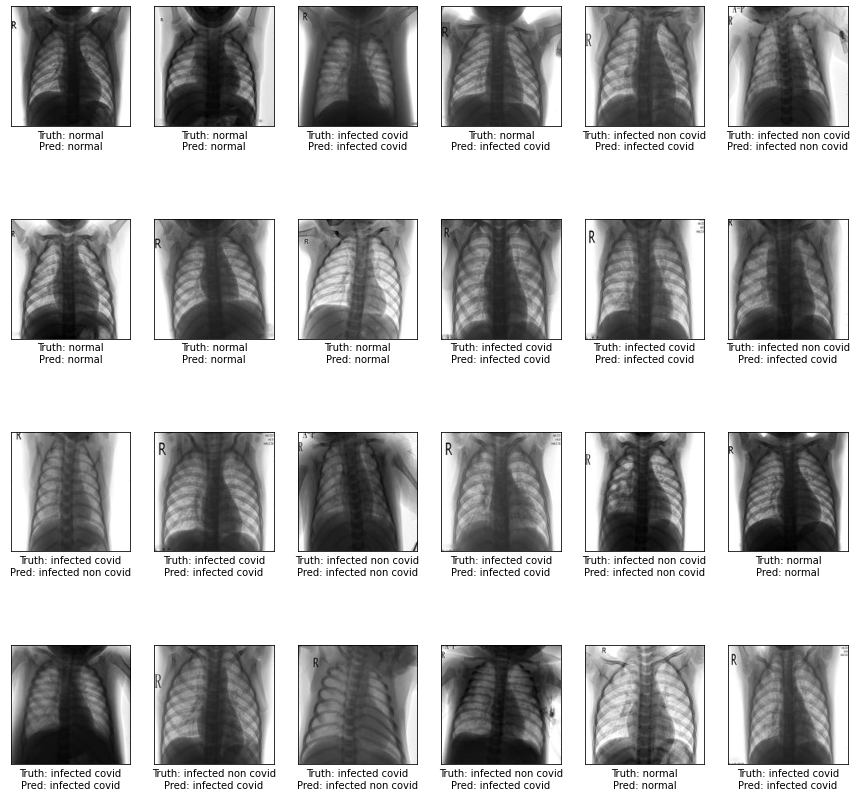

In [69]:
print("Conv")
p = plot_all(lungConv, validloader)

alexNet


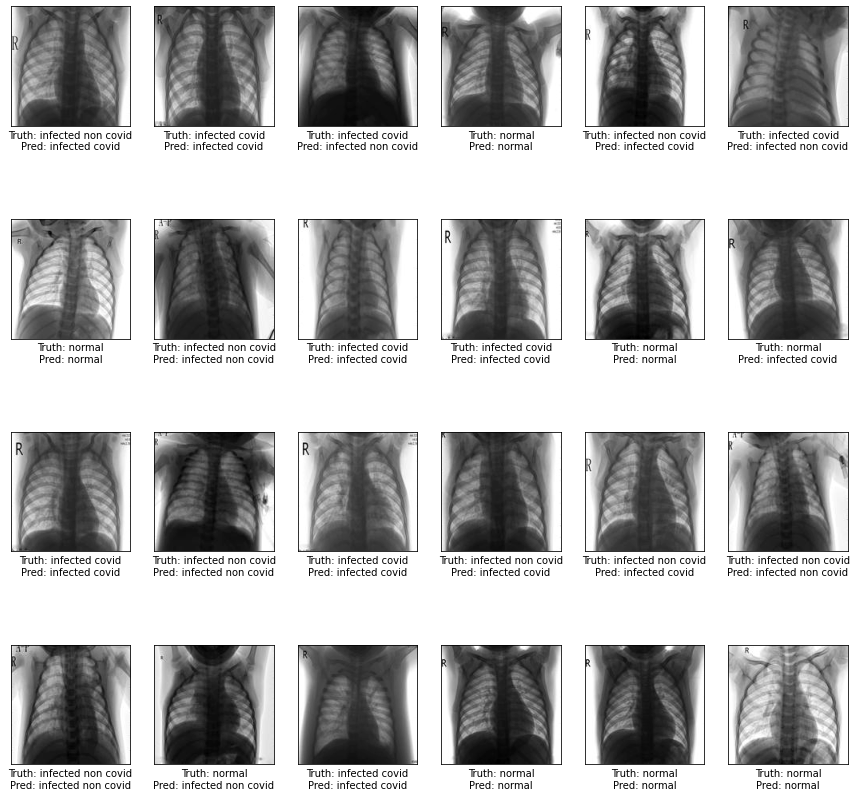

In [70]:
print("alexNet")
p = plot_all(alexNet, validloader)